In [606]:
import pycaret
import pandas as pd
import matplotlib.pyplot as plt

## 1 Data Engineering

In [607]:
# step 1
data = pd.read_csv(r"/Users/user/Downloads/10_RapidKL_Hackthon/data_model.csv")

In [608]:
print('Total size : ',data.shape)

Total size :  (14678, 50)


In [609]:
print('The columsn :',data.columns)

The columsn : Index(['ope_date', 'depot_id', 'line_id_x', 'bus_no', 'point_a', 'point_b',
       'ttl_td_id', 'ttl_captain_id', 'ttl_point_a', 'ttl_point_b',
       'max_diff_minutes_from_point_a', 'max_diff_minutes_idle_mode',
       'max_diff_minutes_to_point_a', 'min_diff_minutes_from_point_a',
       'min_diff_minutes_idle_mode', 'min_diff_minutes_to_point_a',
       'avg_diff_minutes_from_point_a', 'avg_diff_minutes_idle_mode',
       'avg_diff_minutes_to_point_a', 'med_diff_minutes_from_point_a',
       'med_diff_minutes_idle_mode', 'med_diff_minutes_to_point_a',
       'max_speed', 'min_speed', 'avg_speed', 'med_speed', 'ttl_td_completed',
       'line_id_y', 'br_id', 'br_repair_status', 'br_entry_status', 'br_date',
       'br_date_entry', 'br_target_completed', 'br_ttl_days', 'rtd_id',
       'rtd_date', 'route_id', 'bus_model_id', 'driver_id', 'rtd_cause',
       'cause_remark', 'fc_remark', 'date_issues', 'capt_id', 'bcc_acc_id',
       'acc_date', 'bus_damage', 'eng_find', 

In [610]:
data.label.unique()

array(['normal trip', 'engine repair', 'return to depot', 'accident'],
      dtype=object)

In [611]:
# make 'newlabel' as binary.
# jadikan hanya normaltrip sebagai 'N', dan selain itu, kena hantar workshop, high risk!
data.loc[data['label'] == 'normal trip','newlabel'] = 'N'
data.loc[data['newlabel'] != 'N','newlabel'] = 'Y'
print(data.newlabel.value_counts())

N    11083
Y     3595
Name: newlabel, dtype: int64


In [612]:
# #  description of the columns
# #
# # trip_departure.csv
# 'ope_date'
# 'depot_id'
# 'line_id_x'
# 'bus_no'
# 'point_a'
# 'point_b'

# # accident.csv 
# 'ttl_captain_id'
# 'ttl_point_a'
# 'ttl_point_b'

# # ??
# 'max_diff_minutes_from_point_a'
# 'max_diff_minutes_idle_mode'

# 'max_diff_minutes_to_point_a'
# 'min_diff_minutes_from_point_a'

# 'min_diff_minutes_idle_mode'
# 'min_diff_minutes_to_point_a'

# 'avg_diff_minutes_from_point_a'
# 'avg_diff_minutes_idle_mode'

# 'avg_diff_minutes_to_point_a'
# 'med_diff_minutes_from_point_a'

# 'med_diff_minutes_idle_mode'
# 'med_diff_minutes_to_point_a'

# # ??
# 'max_speed'
# 'min_speed'
# 'avg_speed'
# 'med_speed'
# 'ttl_td_completed'

# 'line_id_y'

# # eng_bus_repair.csv
# 'br_id'
# 'br_repair_status'
# 'br_entry_status'
# 'br_date'
# 'br_date_entry'
# 'br_target_completed'
# 'br_ttl_days'
# # return to depot
# # rtd.csv
# 'rtd_id'
# 'rtd_date'
# 'route_id'
# 'bus_model_id'
# 'driver_id'
# 'rtd_cause'
# 'cause_remark'
# 'fc_remark'
# 'date_issues'
# 'capt_id'
# 'bcc_acc_id'
# # accident.csv 
# 'acc_date'
# 'bus_damage'
# 'eng_find'
# 'label'

In [613]:
# step 2
# should drop this since we are not sure how to process this remarks 
data = data.drop(['cause_remark'], axis=1)
data = data.drop(['fc_remark'], axis=1)
data = data.drop(['bus_damage'], axis=1)
# should drop since only 1 or less value or banyak null value 
data = data.drop(['acc_date'], axis=1)
data = data.drop(['eng_find'], axis=1)
data = data.drop(['bcc_acc_id'], axis=1)

In [614]:
# columnms di bawah hendak digunakan 
# sebab nya columns di bawah sudah dalam numerical 
#data = data.drop(['line_id_x'], axis=1)
#data = data.drop(['rtd_cause'], axis=1)
#data = data.drop(['br_id'], axis=1)
#data = data.drop(['br_repair_status'], axis=1)
#data = data.drop(['br_entry_status'], axis=1)
#data = data.drop(['br_ttl_days'], axis=1)
#data = data.drop(['rtd_id'], axis=1)
#data = data.drop(['route_id'], axis=1)
#data = data.drop(['bus_model_id'], axis=1)
#data = data.drop(['driver_id'], axis=1)
#data = data.drop(['capt_id'], axis=1)

In [615]:
# step 3 
# columns ini semua adalah dates
# kena make sense dulu 

# do conversion
#
#
#
data['ope_date'] = pd.to_datetime(data['ope_date'],format='%Y-%m-%d')
data['date_issues'] = pd.to_datetime(data['date_issues'],format='%Y-%m-%d')
data['br_date'] = pd.to_datetime(data['br_date'],format='%Y-%m-%d')
data['br_date_entry'] = pd.to_datetime(data['br_date_entry'],format='%Y-%m-%d')
data['br_target_completed'] = pd.to_datetime(data['br_target_completed'],format='%Y-%m-%d')
data['rtd_date'] = pd.to_datetime(data['rtd_date'],format='%Y-%m-%d')

# berapa beza waktu masa antara ope_date(trip) dengan mula tanda ada problem(date_issues)
data['WaktuSebelumProblem'] = data['ope_date'].dt.day-data['date_issues'].dt.day
# berapa beza waktu masa antara bus repair(sepatutnya) dengan masa dilakukan inspection (br_date_entry)
data['WaktuSebelumInspection'] = data['br_date_entry'].dt.day-data['br_date'].dt.day
# berapa beza waktu masa digunakan untuk repair antara br_date_entry dengan br_target_completed
data['WaktuDiambikUtkRepair'] = data['br_target_completed'].dt.day-data['rtd_date'].dt.day
# 

# once done, the tdrop
# 
data = data.drop(['ope_date'], axis=1)
data = data.drop(['date_issues'], axis=1)
data = data.drop(['br_date'], axis=1)
data = data.drop(['br_date_entry'], axis=1)
data = data.drop(['br_target_completed'], axis=1)
data = data.drop(['rtd_date'], axis=1)

In [616]:
# Step 4 
# baru encoding yg belum numerical nie. 
# encode 1 
# bus label
data.cc = pd.Categorical(data.label)
data['labelencoded'] = data.cc.codes
data = data.drop('label',axis=1)
print(data.labelencoded.value_counts())
# encode 2 
# bus id 
data.cc = pd.Categorical(data.bus_no)
data['busencoded'] = data.cc.codes
data = data.drop('bus_no',axis=1)
print(data.busencoded.value_counts())
# encode 3
# point_a
data.cc = pd.Categorical(data.point_a)
data['point_aencoded'] = data.cc.codes
data = data.drop('point_a',axis=1)
print(data.point_aencoded.value_counts())
# encode 4
# point_b
data.cc = pd.Categorical(data.point_b)
data['point_bencoded'] = data.cc.codes
data = data.drop('point_b',axis=1)
print(data.point_bencoded.value_counts())
# encode 5
# line_id_y
data.cc = pd.Categorical(data.line_id_y)
data['line_id_yencoded'] = data.cc.codes
data = data.drop('line_id_y',axis=1)
print(data.line_id_yencoded.value_counts())
# encode 6
# br_id
data.cc = pd.Categorical(data.br_id)
data['br_idencoded'] = data.cc.codes
data = data.drop('br_id',axis=1)
print(data.br_idencoded.value_counts())
# encode 7
# br_id
data.cc = pd.Categorical(data.br_repair_status)
data['br_repair_statusencoded'] = data.cc.codes
data = data.drop('br_repair_status',axis=1)
print(data.br_repair_statusencoded.value_counts())
# encode 8
# br_id
data.cc = pd.Categorical(data.br_entry_status)
data['br_entry_statusencoded'] = data.cc.codes
data = data.drop('br_entry_status',axis=1)
print(data.br_entry_statusencoded.value_counts())


# encode 9
# br_id
data.cc = pd.Categorical(data.line_id_x)
data['line_id_x_en'] = data.cc.codes
data = data.drop('line_id_x',axis=1)
print(data.line_id_x_en.value_counts())



# encode 10
# br_id
data.cc = pd.Categorical(data.rtd_cause)
data['rtd_cause_en'] = data.cc.codes
data = data.drop('rtd_cause',axis=1)
print(data.rtd_cause_en.value_counts())


# encode 11
# br_id
data.cc = pd.Categorical(data.br_ttl_days)
data['br_ttl_days_en'] = data.cc.codes
data = data.drop('br_ttl_days',axis=1)
print(data.br_ttl_days_en.value_counts())



# encode 12
# br_id
data.cc = pd.Categorical(data.rtd_id)
data['rtd_id_en'] = data.cc.codes
data = data.drop('rtd_id',axis=1)
print(data.rtd_id_en.value_counts())

# encode 13
# br_id
data.cc = pd.Categorical(data.route_id)
data['route_id_en'] = data.cc.codes
data = data.drop('route_id',axis=1)
print(data.route_id_en.value_counts())


# encode 14
# br_id
data.cc = pd.Categorical(data.bus_model_id)
data['bus_model_id_en'] = data.cc.codes
data = data.drop('bus_model_id',axis=1)
print(data.bus_model_id_en.value_counts())

# encode 15
# br_id
data.cc = pd.Categorical(data.driver_id)
data['driver_id_en'] = data.cc.codes
data = data.drop('driver_id',axis=1)
print(data.driver_id_en.value_counts())


# encode 16
# br_id
data.cc = pd.Categorical(data.capt_id)
data['capt_id_en'] = data.cc.codes
data = data.drop('capt_id',axis=1)
print(data.capt_id_en.value_counts())

# encode 7
# br_id
data.cc = pd.Categorical(data.newlabel)
data['newlabel_en'] = data.cc.codes
data = data.drop('newlabel',axis=1)
print(data.newlabel_en.value_counts())



2    11083
1     2576
3     1015
0        4
Name: labelencoded, dtype: int64
76     475
643    278
573    142
373    131
652    123
      ... 
16       1
453      1
275      1
548      1
421      1
Name: busencoded, Length: 658, dtype: int64
77     879
23     571
64     457
88     441
72     355
      ... 
1       17
0       13
5       12
124      5
83       3
Name: point_aencoded, Length: 129, dtype: int64
64     1560
90      864
65      703
101     580
48      491
       ... 
99       14
97       12
23       12
62        4
38        3
Name: point_bencoded, Length: 147, dtype: int64
129    879
67     455
125    345
116    303
140    296
      ... 
4       15
14      14
15      12
13      12
70       8
Name: line_id_yencoded, Length: 167, dtype: int64
-1       12102
 23          4
 587         4
 846         4
 41          4
         ...  
 332         1
 383         1
 399         1
 453         1
 1041        1
Name: br_idencoded, Length: 2535, dtype: int64
-1    12102
 3     1591
 0

In [617]:
# fillna
data.fillna(0,inplace=True)

In [618]:
# Step 5 
# Revisit the labelencoded


In [619]:
# save the data 
data = data.reset_index()
del data['index']
data.to_csv(r"data.csv",index=False)

In [620]:
data.head(3)

,depot_id,ttl_td_id,ttl_captain_id,ttl_point_a,ttl_point_b,max_diff_minutes_from_point_a,max_diff_minutes_idle_mode,max_diff_minutes_to_point_a,min_diff_minutes_from_point_a,min_diff_minutes_idle_mode,...,br_entry_statusencoded,line_id_x_en,rtd_cause_en,br_ttl_days_en,rtd_id_en,route_id_en,bus_model_id_en,driver_id_en,capt_id_en,newlabel_en
0,10,14,1,1,1,84.533333,102.900000,80.500000,63.883333,29.100000,...,-1,0,-1,-1,-1,-1,-1,-1,-1,0
1,10,12,1,1,1,158.950000,46.250000,106.600000,45.866667,3.800000,...,-1,0,-1,-1,-1,-1,-1,-1,-1,0
2,10,12,1,1,1,83.283333,104.966667,80.116667,78.750000,34.916667,...,-1,0,-1,-1,-1,-1,-1,-1,-1,0


In [621]:
# since the 'labelencoded' is not balanced, hence need to use SMOTE
# but some said SMOTE is not correct. i seems to agree too. 
# therefore, in the end, i don't use any SMOTE 

In [622]:
# from imblearn.over_sampling import SMOTE
# seed = 100
# k =1
# X = data.loc[:, data.columns != 'labelencoded']
# y = data.labelencoded
# sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
# X_res, y_res = sm.fit_resample(X, y)

In [623]:
# print(X_res.shape)
# print(y_res.shape)

# X_res.head(2)

# df = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
# # rename the columns
# df.to_csv('df_smoted.csv', index=False, encoding='utf-8')

# print(df.shape)
# df.head(2)

In [624]:
data.index

RangeIndex(start=0, stop=14678, step=1)

# 2 Machine Learning

In [625]:
print(data.shape)
data_insample = data.sample(frac=0.70, random_state=10).reset_index(drop=True)
data_outsample = data.drop(data_insample.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data_insample.shape))
print('Unseen Data For Predictions: ' + str(data_outsample.shape))

(14678, 42)
Data for Modeling: (10275, 42)
Unseen Data For Predictions: (4403, 42)


In [626]:
from pycaret.classification import *
s = setup(data_insample, target = 'newlabel_en', session_id = 123)

,Description,Value
0,Session id,123
1,Target,newlabel_en
2,Target type,Binary
3,Original data shape,"(10275, 42)"
4,Transformed data shape,"(10275, 42)"
5,Transformed train set shape,"(7192, 42)"
6,Transformed test set shape,"(3083, 42)"
7,Numeric features,41
8,Preprocess,True
9,Imputation type,simple


In [627]:
get_config('X_train_transformed').columns

Index(['depot_id', 'ttl_td_id', 'ttl_captain_id', 'ttl_point_a', 'ttl_point_b',
       'max_diff_minutes_from_point_a', 'max_diff_minutes_idle_mode',
       'max_diff_minutes_to_point_a', 'min_diff_minutes_from_point_a',
       'min_diff_minutes_idle_mode', 'min_diff_minutes_to_point_a',
       'avg_diff_minutes_from_point_a', 'avg_diff_minutes_idle_mode',
       'avg_diff_minutes_to_point_a', 'med_diff_minutes_from_point_a',
       'med_diff_minutes_idle_mode', 'med_diff_minutes_to_point_a',
       'max_speed', 'min_speed', 'avg_speed', 'med_speed', 'ttl_td_completed',
       'WaktuSebelumProblem', 'WaktuSebelumInspection',
       'WaktuDiambikUtkRepair', 'labelencoded', 'busencoded', 'point_aencoded',
       'point_bencoded', 'line_id_yencoded', 'br_idencoded',
       'br_repair_statusencoded', 'br_entry_statusencoded', 'line_id_x_en',
       'rtd_cause_en', 'br_ttl_days_en', 'rtd_id_en', 'route_id_en',
       'bus_model_id_en', 'driver_id_en', 'capt_id_en'],
      dtype='object')

<Axes: >

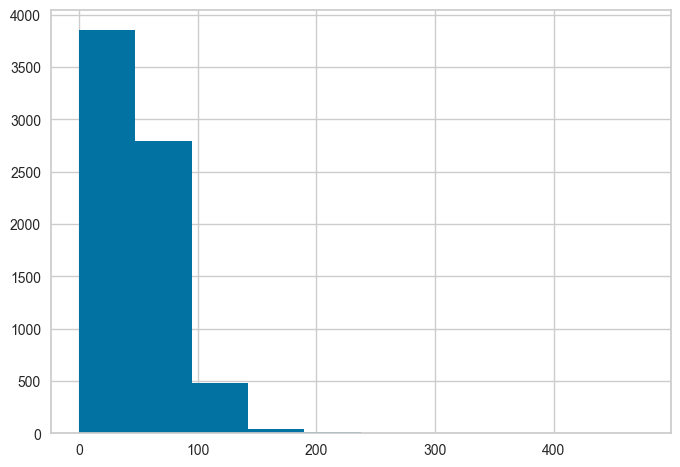

In [628]:
get_config('X_train_transformed')['max_diff_minutes_from_point_a'].hist()

In [629]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0940
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0950
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1030
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0970
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1030
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1070
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0940
lr,Logistic Regression,0.9999,1.0000,0.9994,1.0000,0.9997,0.9996,0.9996,0.1070
qda,Quadratic Discriminant Analysis,0.9997,0.9998,1.0000,0.9989,0.9994,0.9993,0.9993,0.0950
svm,SVM - Linear Kernel,0.9993,0.0000,0.9972,1.0000,0.9986,0.9981,0.9981,0.0940


In [630]:
# Ensemble model 
knn = create_model('knn')
# train individual models to blend
dt = create_model('dt', verbose = False)
rf = create_model('rf', verbose = False)
et = create_model('et', verbose = False)
# blend individual models
blender = blend_models(estimator_list = [dt, rf,et])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9917,0.9915,0.9661,1.0000,0.9828,0.9773,0.9775
1,0.9931,0.9943,0.9718,1.0000,0.9857,0.9811,0.9813
2,0.9889,1.0000,0.9545,1.0000,0.9767,0.9694,0.9699
3,0.9958,1.0000,0.9830,1.0000,0.9914,0.9886,0.9887
4,0.9903,0.9971,0.9602,1.0000,0.9797,0.9733,0.9737
5,0.9958,0.9971,0.9830,1.0000,0.9914,0.9886,0.9887
6,0.9986,1.0000,0.9944,1.0000,0.9972,0.9962,0.9963
7,0.9972,0.9972,0.9887,1.0000,0.9943,0.9925,0.9925
8,0.9930,0.9915,0.9718,1.0000,0.9857,0.9811,0.9813


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [632]:
tuned_knn = tune_model(knn)
#tuned_dt = tune_model(dt)
#tuned_rf = tune_model(rf)
#tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9917,0.9915,0.9661,1.0000,0.9828,0.9773,0.9775
1,0.9931,0.9943,0.9718,1.0000,0.9857,0.9811,0.9813
2,0.9889,1.0000,0.9545,1.0000,0.9767,0.9694,0.9699
3,0.9958,1.0000,0.9830,1.0000,0.9914,0.9886,0.9887
4,0.9903,0.9971,0.9602,1.0000,0.9797,0.9733,0.9737
5,0.9958,0.9971,0.9830,1.0000,0.9914,0.9886,0.9887
6,0.9986,1.0000,0.9944,1.0000,0.9972,0.9962,0.9963
7,0.9972,0.9972,0.9887,1.0000,0.9943,0.9925,0.9925
8,0.9930,0.9915,0.9718,1.0000,0.9857,0.9811,0.9813


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


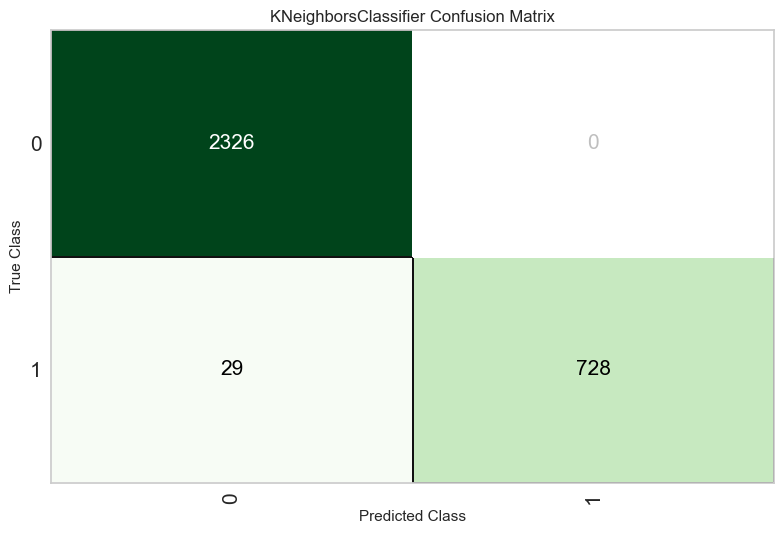

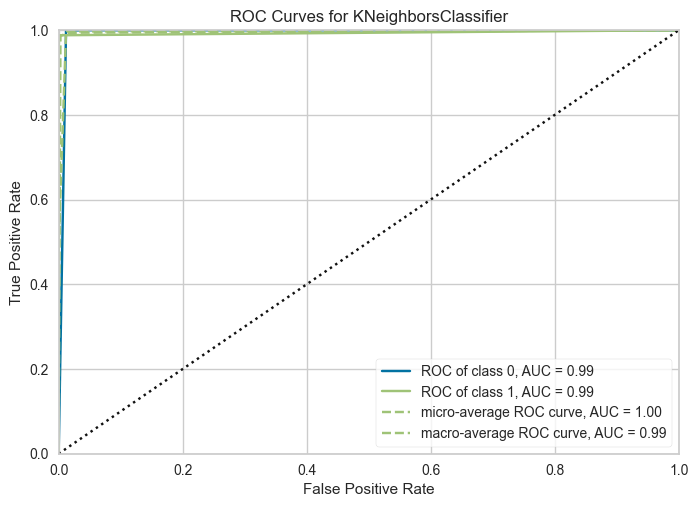

In [634]:
# plot confusion matrix
plot_model(tuned_knn, plot = 'confusion_matrix')
# plot AUC
plot_model(tuned_knn, plot = 'auc')
# plot feature importance
#plot_model(tuned_knn, plot = 'feature')

In [635]:
predict_model(tuned_knn);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9906,0.9940,0.9617,1.0000,0.9805,0.9743,0.9746


In [636]:
final_ = finalize_model(tuned_knn)

In [637]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [638]:
save_model(best, 'Rapid_multiclassification_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/90/0dsv350s24j__4rhx_slnfg40000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['depot_id', 'ttl_td_id',
                                              'ttl_captain_id', 'ttl_point_a',
                                              'ttl_point_b',
                                              'max_diff_minutes_from_point_a',
                                              'max_diff_minutes_idle_mode',
                                              'max_diff_minutes_to_point_a',
                                              'min_diff_minutes_from_point_...
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
 

# Predict Out-of-sample data 

In [641]:
unseen_predictions = predict_model(final_, data=data_outsample)
unseen_predictions.tail()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,depot_id,ttl_td_id,ttl_captain_id,ttl_point_a,ttl_point_b,max_diff_minutes_from_point_a,max_diff_minutes_idle_mode,max_diff_minutes_to_point_a,min_diff_minutes_from_point_a,min_diff_minutes_idle_mode,...,rtd_cause_en,br_ttl_days_en,rtd_id_en,route_id_en,bus_model_id_en,driver_id_en,capt_id_en,newlabel_en,prediction_label,prediction_score
4398,5,16,1,1,1,119.000000,76.500000,112.983330,66.483330,1.0,...,-1,-1,-1,-1,-1,-1,-1,0,0,1.0
4399,5,10,1,1,1,70.216667,60.816666,120.283333,56.366665,0.0,...,-1,-1,-1,-1,-1,-1,-1,0,0,1.0
4400,5,32,1,1,1,8.500000,54.049999,98.483330,5.000000,0.5,...,-1,-1,-1,-1,-1,-1,-1,0,0,1.0
4401,2,43,2,1,1,33.000000,44.016666,43.483334,26.500000,2.0,...,-1,-1,-1,-1,-1,-1,-1,0,0,1.0
4402,2,48,2,1,1,39.000000,28.983334,36.500000,25.000000,2.5,...,-1,-1,-1,-1,-1,-1,-1,0,0,1.0


In [640]:
unseen_predictions.to_csv(r"result_score_outofsample.csv",index=False)